In [57]:
from loading_helper import load_data
from baseline_model import BaselineModel

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
one_khz = True

In [29]:
x_train, y_train = load_data(one_khz=one_khz)

x_train = x_train.view(x_train.shape[0], -1)

In [31]:
model = BaselineModel()

In [25]:
model.train(x_train, y_train)

In [26]:
x_test, y_test = load_data(train=False, one_khz=one_khz)

x_test = x_test.view(x_test.shape[0], -1)

In [27]:
y_hat = model.predict(x_test)

print('Accuracy : {}%'.format(100*sum(y_hat == y_test)/len(y_test)))

Accuracy : 73.0%


### Test of the cross validation

In [36]:
model = BaselineModel()
model.cross_validation(x_train, y_train)

[[ 30.8  33.1  37.9 ...  32.9  33.8  32.8]
 [135.7 132.  126.9 ... -16.6 -17.  -16.1]
 [ 69.4  64.1  59.2 ...  10.7   9.1   8. ]
 ...
 [ 92.9  94.7  95.7 ...   6.7   7.8   7.5]
 [ 75.4  68.6  67.6 ...  15.4  13.2  10.7]
 [ 81.   79.2  75.  ... 105.9 102.7 102.2]]


(0.7031025985663083, 0.05466136349450192)

## Test of parameters tuning

In [47]:
model = BaselineModel()

params = dict(C=[1, 2, 3, 4])

In [48]:
clf = model.tune_params(params, x_train, y_train)

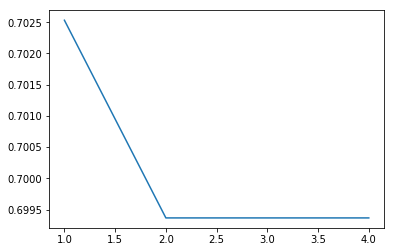

In [58]:
plt.plot(params['C'], clf.cv_results_['mean_test_score'])